In [ ]:
#import all the important packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
#Open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream=True).raw)

Loading original and user provided immages

In [ ]:
#the files format of the source file,
print("original image format:",original.format)
print("Tampered image Format",tampered.format)
#image  size in pixel the  size is given as 2-tuple(width,height)
print("Original image size:" ,original.size)
print("tampered image size:" , tampered.size)

original image format: JPEG
Tampered image Format PNG
Original image size: (1200, 800)
tampered image size: (282, 179)


Converting the Format of tampered image to similar to original imge

In [ ]:
#resize image
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.png')# save image
tampered = tampered.resize((250,160))
print((tampered.size))
tampered.save('pan_card_tampering/image/tampered.png') # saves image

(250, 160)
(250, 160)


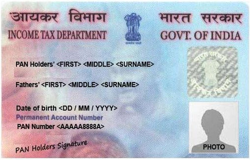

In [ ]:
# display origial image
original

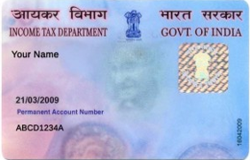

In [ ]:
#display tampered image
tampered

User provided image which will be compared with pancard


In [ ]:
#load the two input images
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

Reading images using opencv

In [ ]:
#convert the images to  grayscale
original_gray = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

Converting images to grayscale using opencv because in image processing many applications doesn't help us in identifying the important edges of coloured images also coloured images are bit to complex by machine learning because they have 3 channel while grayscale has only 1 channel

In [ ]:
#compute the structural similarity index (ssim) between the two images ensuring that the difference image is returned
(score,diff)  = structural_similarity(original_gray,tampered_gray,full=True)
diff = (diff *255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


Structural similarity index help us to determine exactly where in term of x,y coordinated location the image difference are. here we are trying to find similarity between original and tampered image the lower the SSIM score lower is  the similarity

threshold function of computer vision which apply an adaptive threshold to the image which is stored in form of array.this function transform the grayscale image using into binary image using a mathematical formula.
find contours works on binary image and retrive the contours thsi contours are usefull tools for shaping analysis and recognition

In [ ]:
thresh = cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
# loops over the contours
for c in cnts:
  #applying contours on image
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

Bounding rectangle helps in finding ration of width to high of bounding rectangle of the object we compute the bounding box of the countour and then draw the bounding box on both input images to represnet where the two images are differnt or not

Original  format image 


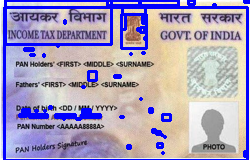

In [ ]:
#display orignal image with contour
print('Original  format image ')
Image.fromarray(original)

Tampered Image


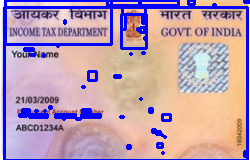

In [ ]:
# display tampered image of contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


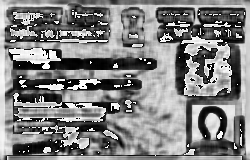

In [ ]:
# display difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


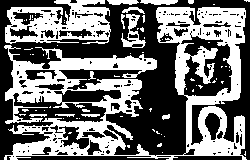

In [ ]:
#display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)